## Load the Dataset

In [4]:
import pandas as pd

# Load the sample dataset (small file kept in repo)
df = pd.read_csv("data/data_sample.csv",  encoding='ISO-8859-1')

# If running locally with full dataset (optional), uncomment this:
# df = pd.read_csv("data/data.csv", encoding="ISO-8859-1")


df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Inspect the columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    1000 non-null   object 
 1   StockCode    1000 non-null   object 
 2   Description  999 non-null    object 
 3   Quantity     1000 non-null   int64  
 4   InvoiceDate  1000 non-null   object 
 5   UnitPrice    1000 non-null   float64
 6   CustomerID   999 non-null    float64
 7   Country      1000 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 62.6+ KB


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,1000.000000,1000.000000,999.000000
mean,12.785000,3.037110,16023.130130
std,38.423706,5.896942,1865.129933
min,-24.000000,0.000000,12431.000000
25%,2.000000,1.250000,14688.000000
50%,4.000000,2.100000,16210.000000
75%,12.000000,3.750000,17908.000000
max,600.000000,165.000000,18085.000000


In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    1
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     1
Country        0
dtype: int64

## Clean the data

In [9]:
df = df[df['CustomerID'].notnull()]

In [10]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [11]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [12]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


##  RFM Feature Engineering

In [14]:
# Latest purchase date in the dataset
reference_date = df['InvoiceDate'].max()


rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,   # Recency
    'InvoiceNo': 'nunique',                                     # Frequency
    'TotalPrice': 'sum'                                         # Monetary
})

# Rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm = rfm.reset_index()
rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12431.0,0,1,358.25
1,12583.0,0,1,855.86
2,12791.0,0,1,192.60
3,12838.0,0,1,390.79
4,13047.0,0,3,366.63


### Normalize skewed data

In [15]:
import numpy as np

rfm_log = rfm.copy()
rfm_log[['Recency', 'Frequency', 'Monetary']] = np.log1p(rfm_log[['Recency', 'Frequency', 'Monetary']])


C:\Users\wasim\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


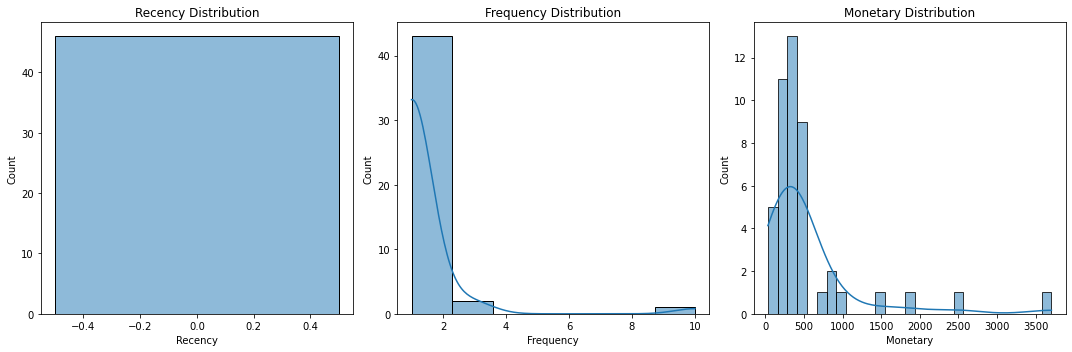

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
for i, col in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(1, 3, i+1)
    sns.histplot(rfm[col], kde=True)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()


## Customer Segmentation with K-Means

### ormalize the Data

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log[['Recency', 'Frequency', 'Monetary']])


### Use Elbow Method to Choose k (Number of Clusters)

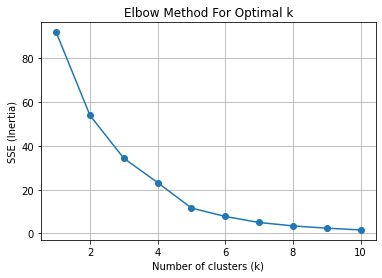

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


### Apply KMeans Clustering

In [19]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


### Analyze the Segments

In [20]:
rfm.groupby('Cluster').mean().round(2)

,CustomerID,Recency,Frequency,Monetary
Cluster,,,,
0,15546.14,0.0,1.02,447.18
1,15443.75,0.0,4.50,1480.98


### Visualize the Clusters (2D & 3D)

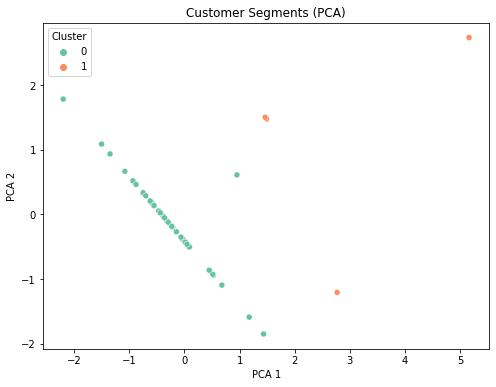

In [21]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca_components = pca.fit_transform(rfm_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1],
                hue=rfm['Cluster'], palette='Set2')
plt.title('Customer Segments (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


In [22]:
rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(2)


,Recency,Frequency,Monetary
Cluster,,,
0,0.0,1.02,447.18
1,0.0,4.50,1480.98


In [23]:
cluster_map = {
    0: 'Loyal Customers',
    1: 'Lost Customers'
}
rfm['Segment'] = rfm['Cluster'].map(cluster_map)


In [24]:
rfm['Segment'].value_counts()


Loyal Customers    42
Lost Customers      4
Name: Segment, dtype: int64

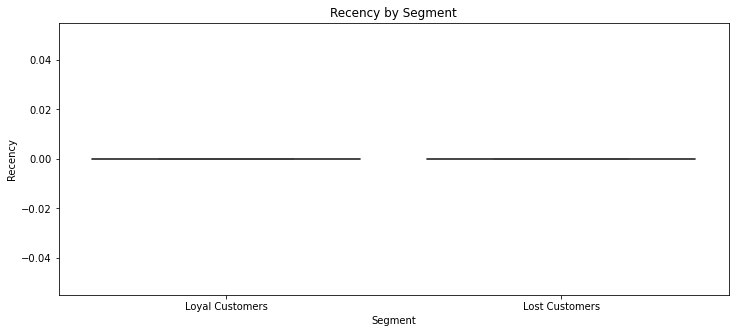

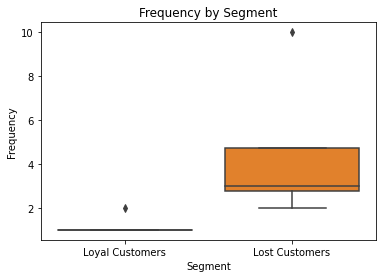

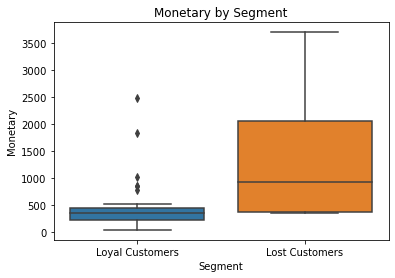

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
sns.boxplot(data=rfm, x='Segment', y='Recency')
plt.title('Recency by Segment')
plt.show()

sns.boxplot(data=rfm, x='Segment', y='Frequency')
plt.title('Frequency by Segment')
plt.show()

sns.boxplot(data=rfm, x='Segment', y='Monetary')
plt.title('Monetary by Segment')
plt.show()


# Dashborad

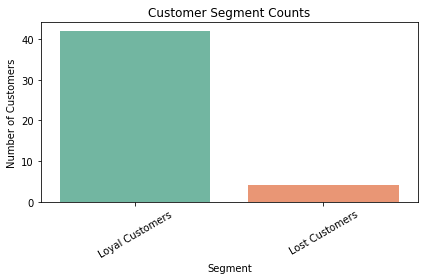

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=rfm, x='Segment', palette='Set2')
plt.title('Customer Segment Counts')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


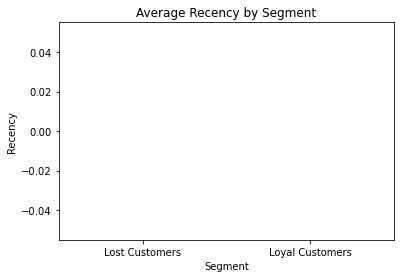

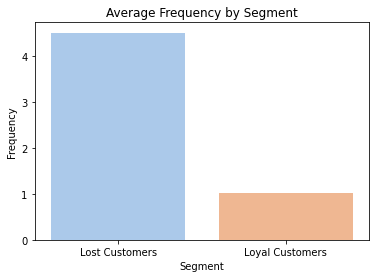

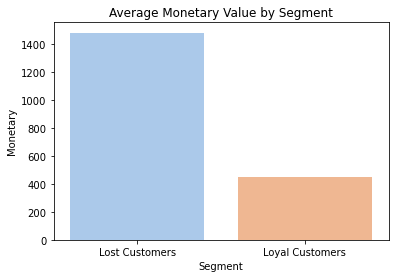

In [27]:
rfm_means = rfm.groupby('Segment')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()

# Recency
sns.barplot(data=rfm_means, x='Segment', y='Recency', palette='pastel')
plt.title('Average Recency by Segment')
plt.show()

# Frequency
sns.barplot(data=rfm_means, x='Segment', y='Frequency', palette='pastel')
plt.title('Average Frequency by Segment')
plt.show()

# Monetary
sns.barplot(data=rfm_means, x='Segment', y='Monetary', palette='pastel')
plt.title('Average Monetary Value by Segment')
plt.show()


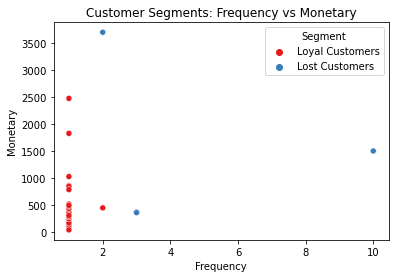

In [28]:
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Segment', palette='Set1')
plt.title('Customer Segments: Frequency vs Monetary')
plt.show()
